In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import utils
from exophase import ExoPhase

In [2]:
a = 5.0         # semi-major axis in AU
D = 10.0        # distance to system in pc
e = 0.          # eccentricity 
argperi = 0.0   # argument of periastron
Omega = 90.0    # longitude of the ascending node 
Rp = 1.0        # planet radius in R_Jup
Ag = 0.5        # planet geometric albedo
MA = np.linspace(0, 2*np.pi, 101) # mean anomaly in radians

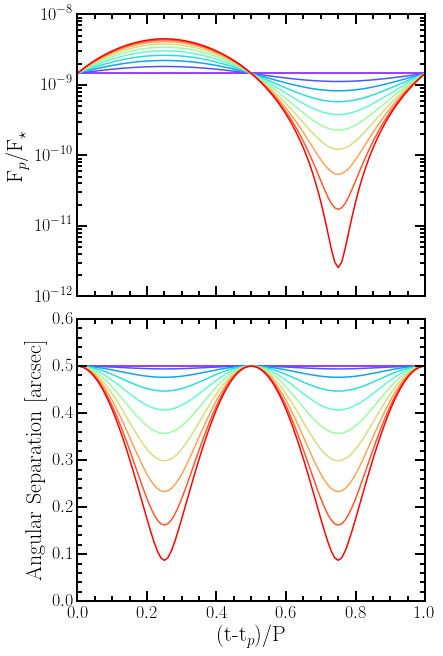

In [3]:
fig, ax = plt.subplots(2,1,figsize=(6,10),sharex=True)
fig.subplots_adjust(hspace=0.08)
i_vals = np.linspace(0, 80, 10) # inclinations
colors = plt.cm.rainbow(np.linspace(0,1,i_vals.size))
for i, c in zip(i_vals, colors):
    phase = ExoPhase(e, i, argperi, Omega, input_deg=True)
    # time, phase angle, true anomaly
    time, alpha, TA = phase.get_arr(MA, ['t', 'alpha', 'TA'])  
    orbdist = utils.orb_dist(TA, a, e)
    # angular separation in arcsec (careful with input units)
    sep = utils.ang_sep(orbdist, TA, argperi*np.pi/180.0, i*np.pi/180.0, D)
    fr = utils.flux_ratio(utils.lambert(alpha), orbdist, Ag, Rp)
    ax[0].plot(time, fr, c=c, lw=1.5)
    ax[1].plot(time, sep, c=c, lw=1.5)

ax[0].set_xlim(0, 1)
ax[0].set_ylabel('F$_p$/F$_\star$')
ax[0].set_yscale('log')
ax[0].minorticks_on()
ax[1].set_ylim(0,0.6)
ax[1].set_xlabel('(t-t$_p$)/P')
ax[1].set_ylabel('Angular Separation [arcsec]')
ax[1].minorticks_on();